In [1]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
item = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [3]:
encoder = LabelEncoder()
encoder.fit(item) # 중복없이 목록을 만든다.
labels = encoder.transform(item) # 데이터를 숫자로 바꿔준다.
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [4]:
encoder.classes_ #영문, 한글순

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [6]:
encoder.inverse_transform(labels) # 숫자를 데이터로 바꿔줌

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U5')

In [ ]:
# 알고리즘 상 숫자값이 클수록 중요하다고 본다는 문제가 생긴다.
# 그래서 같은 값의 크기로 가질 수 있도록 맞춰주어야한다. -> 원-핫 인코딩 One-Hot Encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [10]:
item = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

In [12]:
item = np.array(item).reshape(-1, 1) # 형태를 맞춰주지 않으면 차원이 맞지 않아 연산이 안된다., 먼저 item을 array로 바꿔준다음 reshape #개수를 정확히 모를 때 -1행, 컬럼수 1

In [13]:
item # 한 행에 한 건의 데이터가 되어야한다.

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [16]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(item)
oh_label = oh_encoder.transform(item)
oh_label

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [17]:
oh_label.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [18]:
import pandas as pd

In [21]:
df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [ ]:
# 숫자의 크기가 모델에 영향을 끼친다면 원핫인코딩을 써야한다. 하지만 용량문제가 있을 수 있다.

In [ ]:
# 머신러닝에서는 값의 가치를 동일하게 맞춰주는 작업이 필요하다. -> 피처 스케일링과 정규화

In [24]:
from sklearn.datasets import load_iris
import pandas as pd

In [25]:
iris = load_iris()

In [26]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [29]:
print('feature 들의 평균값:\n',iris_df.mean())

feature 들의 평균값:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [30]:
print('feature 들의 분산값:\n',iris_df.var())

feature 들의 분산값:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler() # z = ( x - u ) / s
# scaler.fit(iris_df)
# scaler.transform(iris_df)
iris_scaled = scaler.fit_transform(iris_df) # 위 두 줄에 같은 데이터가 들어가니 한 줄로 표현이 가능하다.

In [35]:
iris_df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)

In [36]:
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [37]:
print('feature들의 평균값:\n', iris_df_scaled.mean()) # 0에 가까움
print('feature들의 분산값:\n', iris_df_scaled.var()) # 1에 가까움

feature들의 평균값:
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산값:
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
# MinMaxScaler 최소값 0, 최대값 1

In [38]:
iris_df.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

In [39]:
iris_df.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris_df)

In [43]:
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소값:\n', iris_df_scaled.min())
print('feature들의 최대값:\n', iris_df_scaled.max())

feature들의 최소값:
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최대값:
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


<AxesSubplot:ylabel='Density'>

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


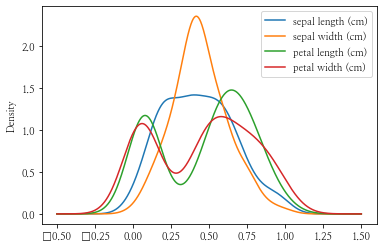

In [50]:
iris_df_scaled.plot(kind='density')

In [60]:
train_array = np.arange(0, 11).reshape(-1, 1) # 0~10까지의 array를 2차원 배열로 변경
test_array = np.arange(0, 6).reshape(-1, 1)

In [61]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_array)

In [62]:
train_scaled

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [63]:
test_scaled = scaler.transform(test_array)

In [64]:
test_scaled

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5]])

In [ ]:
# 테스트데이터는 모델을 트레이닝한 데이터와 같이 맞춰야한다.